### Descriptive stats methods 

In [18]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt  
import seaborn as sns 


In [6]:
df = pd.read_csv("Used_Bikes.csv")
df.head()

,bike_name,price,city,kms_driven,owner,age,power,brand
0,TVS Star City Plus Dual Tone 110cc,35000.0,Ahmedabad,17654.0,First Owner,3.0,110.0,TVS
1,Royal Enfield Classic 350cc,119900.0,Delhi,11000.0,First Owner,4.0,350.0,Royal Enfield
2,Triumph Daytona 675R,600000.0,Delhi,110.0,First Owner,8.0,675.0,Triumph
3,TVS Apache RTR 180cc,65000.0,Bangalore,16329.0,First Owner,4.0,180.0,TVS
4,Yamaha FZ S V 2.0 150cc-Ltd. Edition,80000.0,Bangalore,10000.0,First Owner,3.0,150.0,Yamaha


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32648 entries, 0 to 32647
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bike_name   32648 non-null  object 
 1   price       32648 non-null  float64
 2   city        32648 non-null  object 
 3   kms_driven  32648 non-null  float64
 4   owner       32648 non-null  object 
 5   age         32648 non-null  float64
 6   power       32648 non-null  float64
 7   brand       32648 non-null  object 
dtypes: float64(4), object(4)
memory usage: 2.0+ MB


In [28]:
pd.set_option('display.float_format', '{:.2f}'.format)

In [29]:
df.describe()  # for numericals 

,price,kms_driven,age,power
count,32648.00,32648.00,32648.00,32648.00
mean,68295.42,26344.63,8.05,213.51
std,90718.60,22208.53,4.03,134.43
min,4400.00,1.00,1.00,100.00
25%,25000.00,12000.00,5.00,150.00
50%,43000.00,20373.00,7.00,150.00
75%,80000.00,35000.00,10.00,220.00
max,1900000.00,750000.00,63.00,1800.00


In [30]:
df.describe(include="O")  # for categoricals 
# top ==> Mode value 
# freq => Indicates the number of times the top value appears in the column.

,bike_name,city,owner,brand
count,32648,32648,32648,32648
unique,471,443,4,23
top,Bajaj Pulsar 150cc,Delhi,First Owner,Bajaj
freq,2776,7318,29964,11213


In [31]:
df['owner'].value_counts()

owner
First Owner             29964
Second Owner             2564
Third Owner               108
Fourth Owner Or More       12
Name: count, dtype: int64

In [32]:
df['owner'].value_counts(normalize=True)

owner
First Owner            0.92
Second Owner           0.08
Third Owner            0.00
Fourth Owner Or More   0.00
Name: proportion, dtype: float64

In [33]:
output = df.duplicated().sum()/df.shape[0] * 100
print(f"Duplicate data ratio : {output:.2f} are duplicate data here.")

Duplicate data ratio : 77.57 are duplicate data here.


In [12]:
print("Minimum Price : ",float(df['price'].min()))
print("Maximum Price : ",float(df['price'].max()))
print("Sum of  Price : ",float(df['price'].sum()))
print("No. of ownership : ",float(df['owner'].count()))
print("Average of  Price : ",float(df['price'].mean()))
print("Median of  Price : ",float(df['price'].median()))
print("Variance deviation of  Price : ",float(df['price'].var()))
print("Standard deviation of  Price : ",float(df['price'].std()))


Minimum Price :  4400.0
Maximum Price :  1900000.0
Sum of  Price :  2229708795.0
Sum of  Price :  32648.0
Average of  Price :  68295.41763660868
Median of  Price :  43000.0
Variance deviation of  Price :  8229863516.012512
Standard deviation of  Price :  90718.59520524176


In [35]:
def MyMean(x):
    total_sum = 0 
    count = 0 
    for item in x:
        total_sum += item 
        count += 1 
    average = total_sum/count 
    return f"Your average is : {average:.2f}"
MyMean(df['price'])

'Your average is : 68295.42'

In [ ]:
def MyMedian(arr):
    arr = arr.tolist()
    temp = 0 
    n = len(arr)
    for i in range(n):
        for j in range(i+1,len(arr)):
            if arr[i] > arr[j]:
                temp   = arr[i]
                arr[i] = arr[j]
                arr[j] = temp

    if n % 2 == 0:
        n1 ,n2 = n //2 , (n//2) + 1
        median = (arr[n1] + arr[n2])/2 
    else:
       index = ( n + 1) // 2 
       median = arr[index] 
    return median
MyMedian(df['price'])

43000.0

<h2>Standard deviation</h2> 
<p>Finding the lower bound and upper bound with the help of standard deviation.<br></p>
<img  src="std deviation.PNG" /><br>
<p>We know that in normal distribution after three standard deviation, all point will<br> consider as an outlier, so i am trying to find the lower range and upper range<br> with the help of standard deviation.</p>

In [28]:
normal_distributed_data = np.random.normal(loc=5,scale=1,size=50)


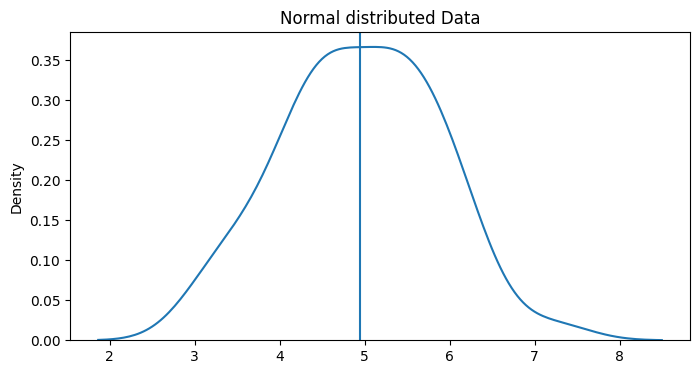

In [34]:
plt.figure(figsize=(8,4))
sns.kdeplot(normal_distributed_data)
plt.axvline(float(normal_distributed_data.mean()))
plt.title("Normal distributed Data")
plt.show()

In [42]:
average_of_variable = float(normal_distributed_data.mean())
standard_deviation = float(normal_distributed_data.std())
lower_range = average_of_variable - (3 * standard_deviation)
upper_range = average_of_variable + (3 * standard_deviation)
print(f"Lower range : {lower_range:.2f}")
print(f"Upper range : {upper_range:.2f}")

Lower range : 2.23
Upper range : 7.65
